<img src='stats/img/topbar.png' />

## Supervised Learning - Classificação

__CONTEÚDO:__<br>
* [8. Support Vectors Machine (SVM)](#8.)
* [8.1 Exemplo 1: Breast Cancer Dataset](#8.1)

<a id="8."></a><br>
### 8. Support Vectors Machine (SVM)

<a id="8.1"></a><br>
### 8.1 Exemplo 1: Breast Cancer Dataset

#### 1. Preparação do problema
* a) Esclarecer o problema
* b) Carregar libraries
* c) Carregar dataset

__Abstract:__ Base dados bastante utilizada no estudo de Machine Learning e que vem embutida no scikit-learn. Apresenta características físicas de três tipos de flores, as quais devem ser usadas para construir um modelo que 'adivinhe' qual a flor.

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_breast_cancer
%matplotlib inline

In [14]:
cancer = load_breast_cancer()
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

#### 2. Sumarizar Dados
* a) Estatística descritiva
* b) Visualização de dados e estrutura
* c) EDA

In [15]:
X = pd.DataFrame(cancer.data, columns=cancer['feature_names'])
y = pd.DataFrame(cancer.target, columns=['diagnosis'])
X.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0                 0.07871  ...         25.38          17.33           184.60   
1                 0.05667  ...         24.99          23.41           158.80   
2                 0.05999  ...         23.57          25.53           152.50   
3                 0.09744  ...         14.91          26.50            98.87   
4                 0.05883  ...         22.54          16.67           152.20   

   worst area  worst smoothness  worst compactness  worst concavity  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   worst concave points  worst symmetry  worst fractal dimension  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 30 columns]

In [17]:
X.describe()

mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       mean symmetry  mean fractal dimension  ...  worst radius  \
count     569.000000              569.000000  ...    569.000000   
mean        0.181162                0.062798  ...     16.269190   
std         0.027414                0.007060  ...      4.833242   
min         0.106000                0.049960  ...      7.930000   
25%         0.161900                0.057700  ...     13.010000   
50%         0.179200                0.061540  ...     14.970000   
75%         0.195700                0.066120  ...     18.790000   
max         0.304000                0.097440  ...     36.040000   

       worst texture  worst perimeter   worst area  worst smoothness  \
count     569.000000       569.000000   569.000000        569.000000   
mean       25.677223       107.261213   880.583128          0.132369   
std         6.146258        33.602542   569.356993          0.022832   
min        12.020000        50.410000   185.200000          0.071170   
25%        21.080000        84.110000   515.300000          0.116600   
50%        25.410000        97.660000   686.500000          0.131300   
75%        29.720000       125.400000  1084.000000          0.146000   
max        49.540000       251.200000  4254.000000          0.222600   

       worst compactness  worst concavity  worst concave points  \
count         569.000000       569.000000            569.000000   
mean            0.254265         0.272188              0.114606   
std             0.157336         0.208624              0.065732   
min             0.027290         0.000000              0.000000   
25%             0.147200         0.114500              0.064930   
50%             0.211900         0.226700              0.099930   
75%             0.339100         0.382900              0.161400   
max             1.058000         1.252000              0.291000   

       worst symmetry  worst fractal dimension  
count      569.000000               569.000000  
mean         0.290076                 0.083946  
std          0.061867                 0.018061  
min          0.156500                 0.055040  
25%          0.250400                 0.071460  
50%          0.282200                 0.080040  
75%          0.317900                 0.092080  
max          0.663800                 0.207500  

[8 rows x 30 columns]

In [18]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

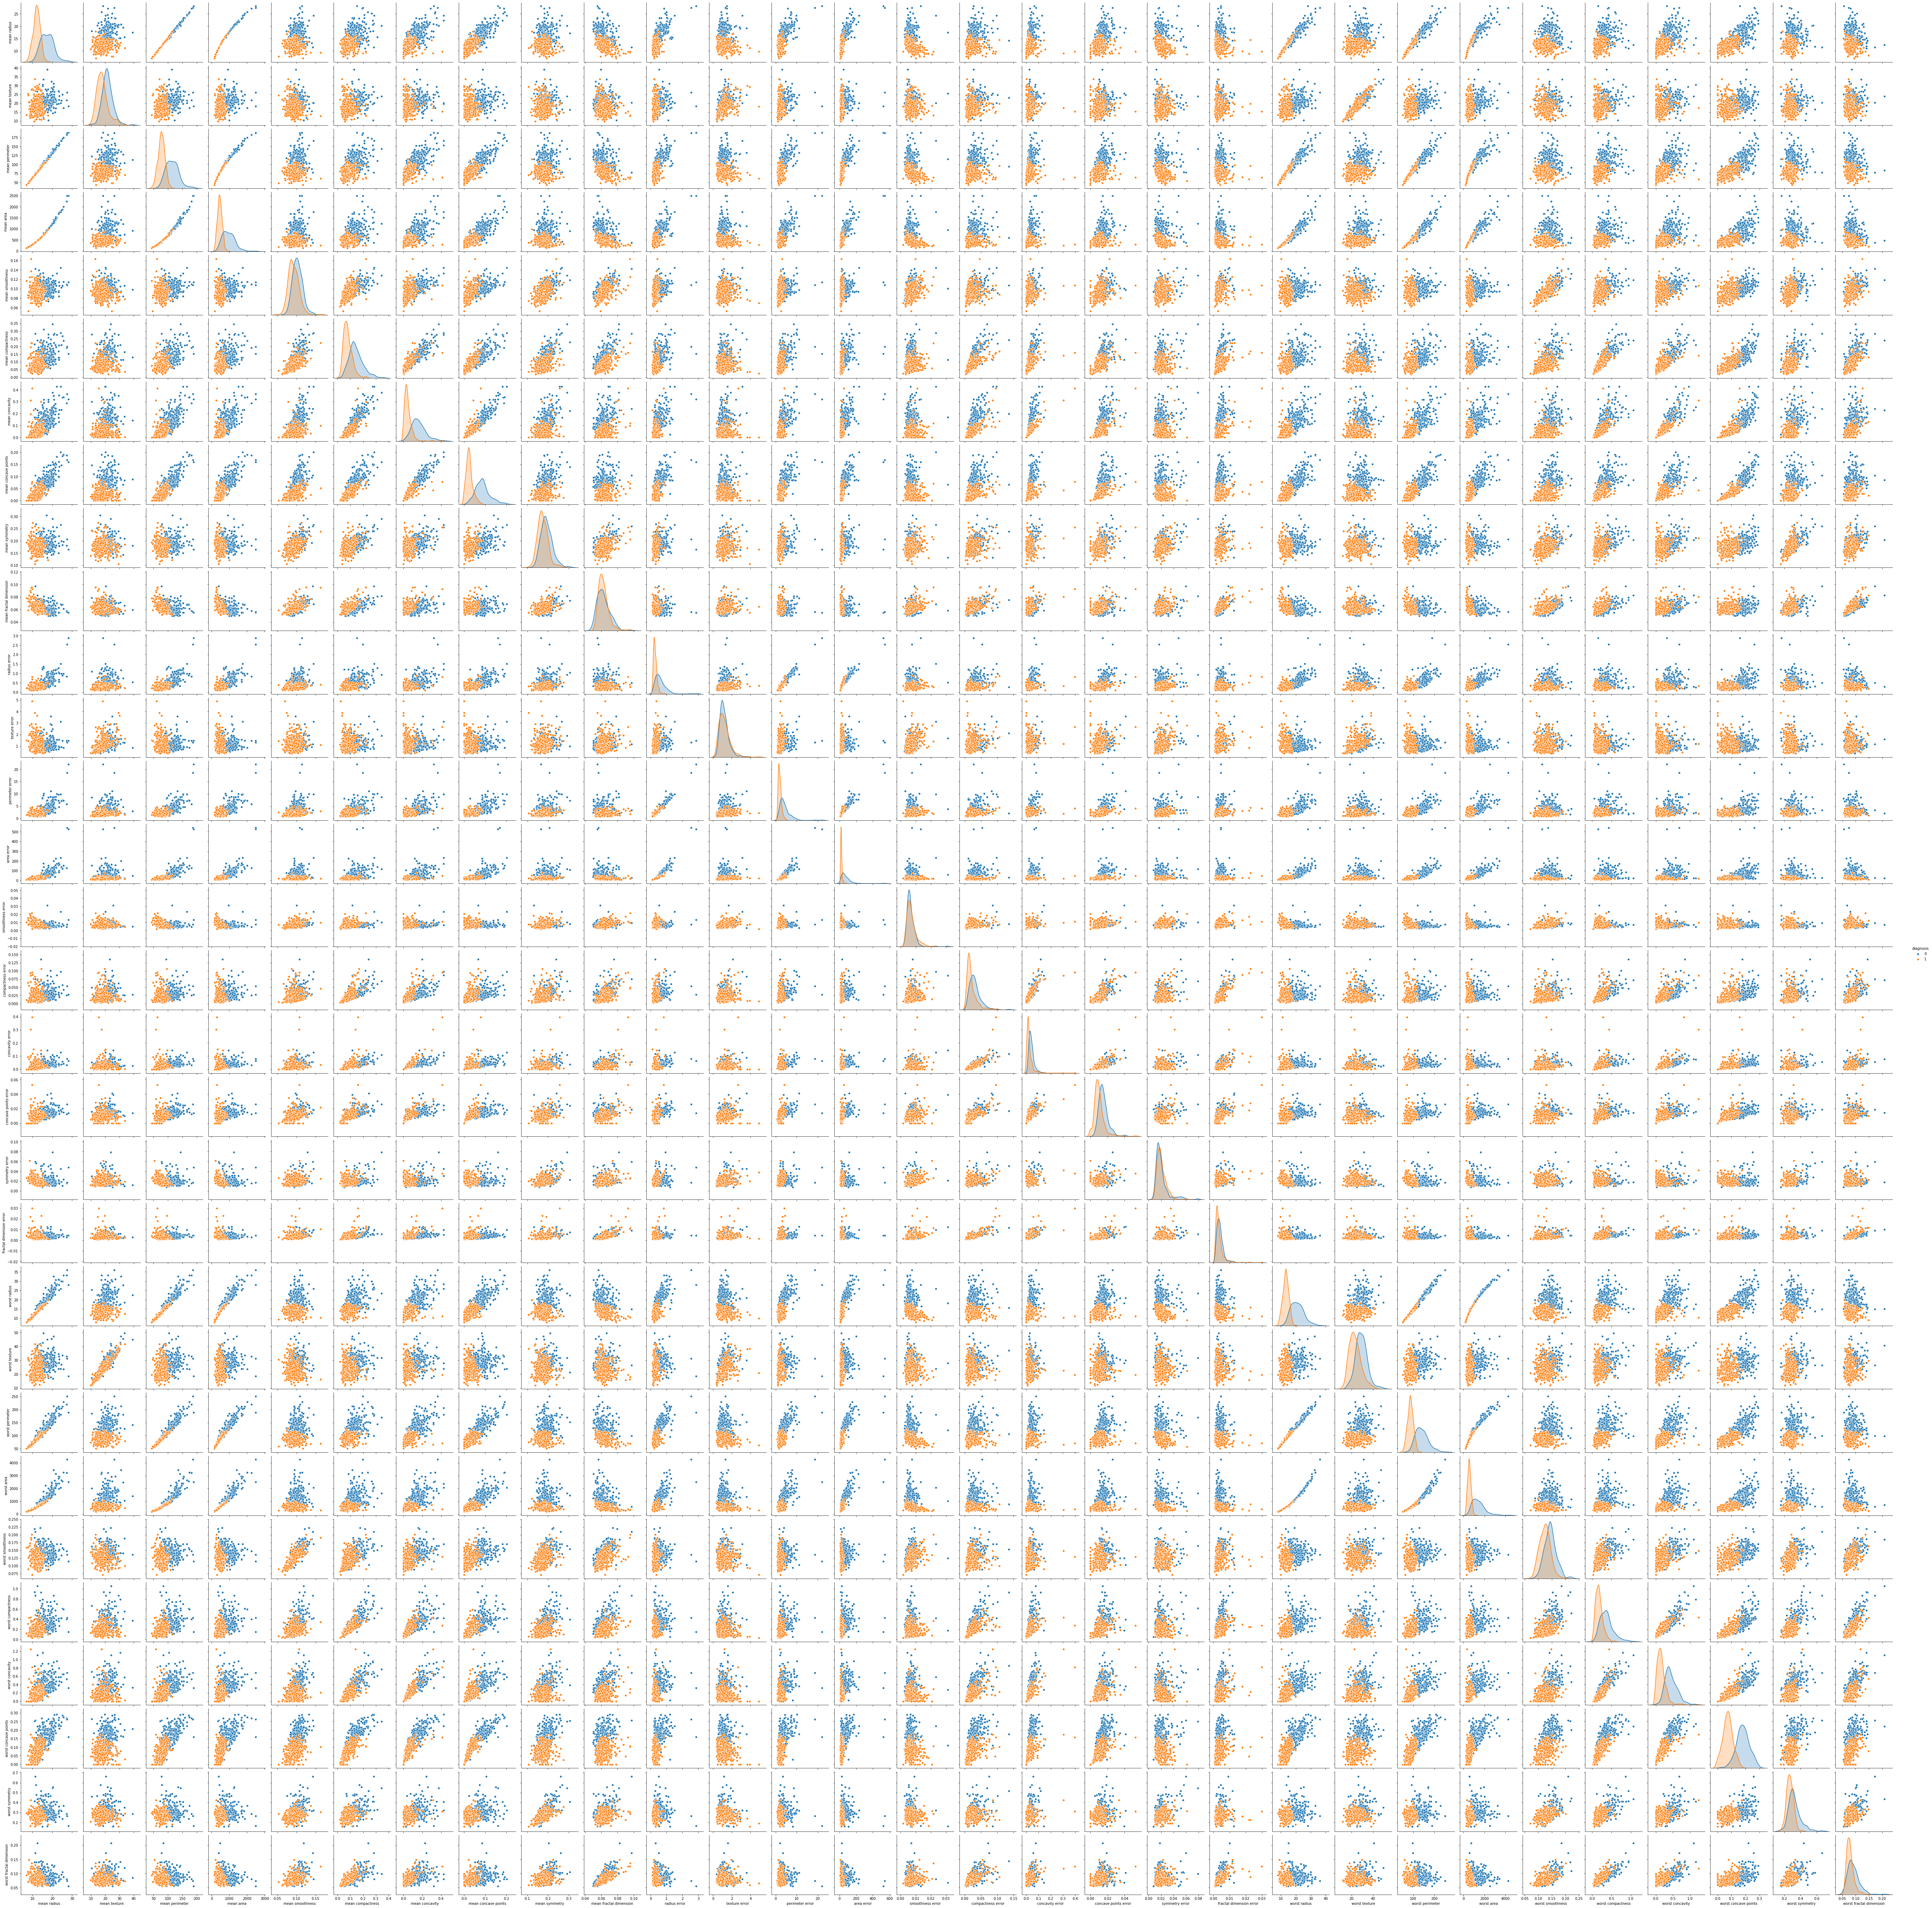

In [19]:
sns.pairplot(pd.concat([X, y], axis=1), hue='diagnosis')

#### 3. Preparar Dados
* a) Limpeza de dados
* b) Seleção de características
* c) Transformação dos dados

In [48]:
# Os dados já vem limpos do sklearn
# Serão usadas todas as características

#### 4. Avaliar algoritmos
* a) Dividir conjunto de dados em partes de treino e teste
* b) Testar opções e métricas de avaliação de desempenho
* c) Implementar e treinar algoritmos
* d) Comparar algoritmos

In [26]:
#Como esse projeto é voltado ao estudo do SVM, não será testado outro algoritmo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [27]:
svm = SVC()
svm.fit(X_train, np.ravel(y_train))

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [62]:
y_pred = svm.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[58 12]
 [ 5 96]]
              precision    recall  f1-score   support

           0       0.92      0.83      0.87        70
           1       0.89      0.95      0.92       101

    accuracy                           0.90       171
   macro avg       0.90      0.89      0.90       171
weighted avg       0.90      0.90      0.90       171



In [64]:
# Verificar desempenho nos diferentes em conjuntos do dataset
kfold = KFold(n_splits=5)
results = cross_val_score(svm, X, np.ravel(y), cv=kfold)
print(f'Desempenho por partição: {results}')
print(f'Média de Desempenho: {results.mean()}')

Desempenho por partição: [0.77192982 0.90350877 0.97368421 0.93859649 0.94690265]
Média de Desempenho: 0.9069243906225741


#### 5. Melhorar Desempenho
__Opção 1:__
   * a) Ajustes e seleção de parâmetros do modelo
   * b) Realizar 'Ensembles' (opcional)
   * c) Realizar Predições no conjunto de validação
   * d) Executar 5. até atingir o desempenho adequado

__Opção 2:__
   * Encontrar com figuração ótima com Cross Validation
   * Verificar desempenho de agrupamentos do dataset com KFold

In [49]:
# São avaliados os parâmetros C e gamma para verificar se é possível melhorar desempenho através do ajuste deles
param_grid = {'C': [0.01, 0.1, 1, 10, 50, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0005, 0.0001, 0.00001], 'kernel': ['rbf']}

In [50]:
grid_svm = GridSearchCV(SVC(), param_grid, verbose=0)

In [51]:
#Treinamento do modelo com as opções de parâmetro informados
grid_svm.fit(X_train, np.ravel(y_train))

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10, 50, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0005, 0.0001, 1e-05],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [52]:
#Combinação de parâmetros com melhor resultado alcançado
grid_svm.best_params_

{'C': 1000, 'gamma': 1e-05, 'kernel': 'rbf'}

In [53]:
grid_svm.best_estimator_

SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1e-05, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [56]:
y_pred_grid = grid_svm.predict(X_test)

In [58]:
print(confusion_matrix(y_test, y_pred_grid))

[[62  8]
 [ 4 97]]


In [60]:
print(classification_report(y_test, y_pred_grid))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91        70
           1       0.92      0.96      0.94       101

    accuracy                           0.93       171
   macro avg       0.93      0.92      0.93       171
weighted avg       0.93      0.93      0.93       171



In [61]:
# Verificar desempenho em diferentes conjuntos do dataset
kfold = KFold(n_splits=5)
results = cross_val_score(grid_svm, X, np.ravel(y), cv=kfold)
print(f'Desempenho por partição: {results}')
print(f'Média de Desempenho: {results.mean()}')

Desempenho por partição: [0.87719298 0.94736842 0.97368421 0.98245614 0.9380531 ]
Média de Desempenho: 0.9437509703462196


#### 6. Finalizar Modelo
* a) Selecionar parâmetros ajustados do modelo
* b) Criar modelo standalone com o conjunto completo de treino
* c) Armazenar modelo para uso futuro

In [ ]:
from pickle import dump, load

# Salvar modelo 
filename = 'svm_gridcv_model.sav'
dump(knn_cv, open(filename, 'wb'))

# Carregar modelo
# loaded_model = load(open(filename, 'rb'))
# result = loaded_model.score(X_test, Y_test)
# print(result)

***
***